In [1]:
import numpy as np
import pandas as pd 
from numbers import Number
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error

%matplotlib inline

In [2]:
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
#Set Nan values of df.waterfront to 0
df.loc[df.waterfront.isna()==True, 'waterfront'] = 0

#Set all sqft_basement values of '?' to 0, then convert to floats.
df.loc[df.sqft_basement=='?', 'sqft_basement'] = 0
df.sqft_basement = df.sqft_basement.astype(float)

#Drop id, and null values of view
cols_to_drop = ['id']
df.drop(cols_to_drop, axis=1, inplace=True)
df.dropna(subset = ['view'], inplace = True)

#Convert date to a datetime, add month and year columns, then drop date column
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].apply(lambda date: date.month)
df['year'] = df['date'].apply(lambda date: date.year)
df.drop('date', axis=1, inplace=True)

In [5]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,...,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2,2015


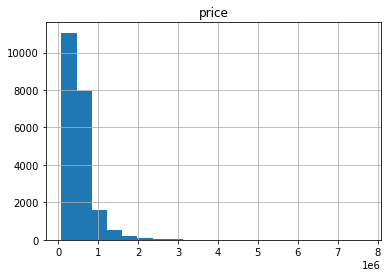

In [6]:
df.hist('price', bins=20);

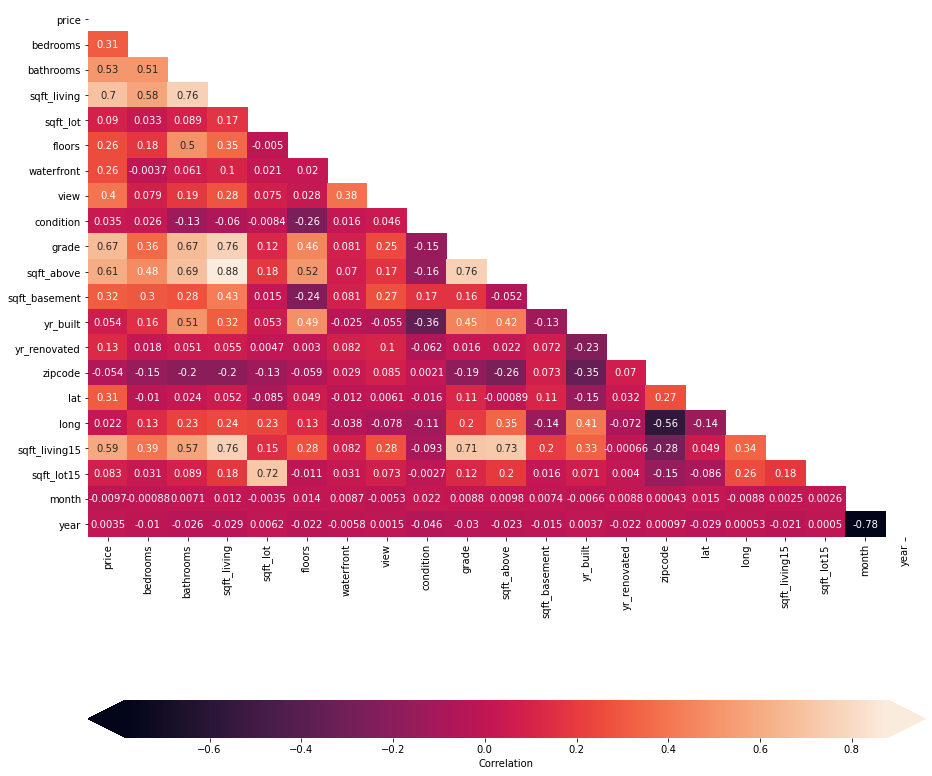

In [7]:
fig, ax = plt.subplots(figsize  =(15,15))
sns.heatmap(
            df.corr(), 
            ax=ax, 
            annot=True, 
            mask=np.triu(np.ones_like(df.corr(), dtype=bool)),
            cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
);

In [9]:
price_corrs = df.corr()['price'].map(abs).sort_values(ascending=False)
price_corrs

price            1.000000
sqft_living      0.701587
grade            0.668307
sqft_above       0.605695
sqft_living15    0.585304
bathrooms        0.525053
view             0.395734
sqft_basement    0.319082
bedrooms         0.308063
lat              0.307868
waterfront       0.259220
floors           0.257052
yr_renovated     0.129887
sqft_lot         0.090338
sqft_lot15       0.083189
yr_built         0.054273
zipcode          0.053620
condition        0.035393
long             0.022417
month            0.009691
year             0.003548
Name: price, dtype: float64

The most correlated feature to price is sqft_living (.7).  We will use this feature to establish a baseline model.

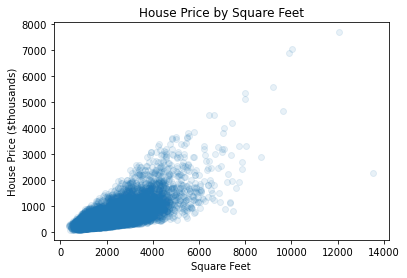

In [10]:
fig, ax = plt.subplots()
ax.scatter(df.sqft_living, df.price, alpha=.1)
ax.set_xlabel('Square Feet')
ax.set_yticks(range(0,9000000,1000000))
ax.set_yticklabels(range(0,9000,1000))
ax.set_ylabel('House Price ($thousands)')
ax.set_title('House Price by Square Feet');

## Baseline model using 'sqft_living' as the only feature

In [11]:
#Statsmodels
y = df.price
X = sm.add_constant(df.sqft_living)
stats_model_baseline = sm.OLS(endog=y, exog=X).fit()
stats_model_baseline.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                 2.087e+04
Date:                Mon, 12 Jul 2021   Prob (F-statistic):               0.00
Time:                        14:53:36   Log-Likelihood:            -2.9912e+05
No. Observations:               21534   AIC:                         5.982e+05
Df Residuals:                   21532   BIC:                         5.983e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.215e+04   4404.521     -9.570      0.000   -5.08e+04   -3.35e+04
sqft_living   279.9321      1.938    144.473      0.000     276.134     283.730
==============================================================================
Omnibus:                    14582.265   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           516142.289
Skew:                           2.781   Prob(JB):                         0.00
Kurtosis:                      26.331   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

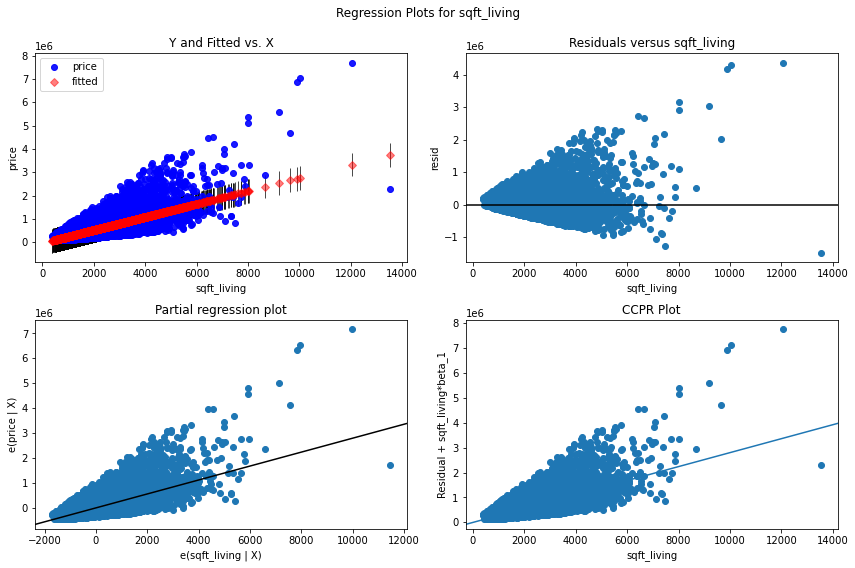

In [12]:
sm.graphics.plot_regress_exog(stats_model_baseline, 'sqft_living', fig = plt.figure(figsize=(12,8)));

In [13]:
#SkLearn
y = df.price
X = df.sqft_living.values.reshape(-1,1)
sk_model_baseline = LinearRegression()
sk_model_baseline.fit(X, y)
score = sk_model_baseline.score(X, y)
coef = sk_model_baseline.coef_
intercept = sk_model_baseline.intercept_
print('R2 score:              ', round(score, 3))
print('sqft_living coef.:     ', round(coef[0], 3))
print('Intercept:            ', round(intercept, 2))

R2 score:               0.492
sqft_living coef.:      279.932
Intercept:             -42152.95


# OLS

In [14]:
X = df[['bedrooms','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition',
       'grade','sqft_above','sqft_basement','sqft_living15','sqft_lot15']]
y = df['price']

X = sm.add_constant(X)

stats_model_1 = sm.OLS(endog=y, exog=X).fit()
stats_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     2554.
Date:                Mon, 12 Jul 2021   Prob (F-statistic):               0.00
Time:                        14:53:48   Log-Likelihood:            -2.9637e+05
No. Observations:               21534   AIC:                         5.928e+05
Df Residuals:                   21520   BIC:                         5.929e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -6.937e+05   1.75e+04    -39.750      0.000   -7.28e+05   -6.59e+05
bedrooms      -1.749e+04   1081.604    -16.167      0.000   -1.96e+04   -1.54e+04
bedrooms      -1.749e+04   1081.604    -16.167      0.000   -1.96e+04   -1.54e+04
bathrooms     -1.536e+04   3489.054     -4.402      0.000   -2.22e+04   -8520.424
sqft_living     166.2194     20.587      8.074      0.000     125.867     206.572
sqft_lot          0.0259      0.055      0.475      0.635      -0.081       0.133
floors        -2511.7496   3985.231     -0.630      0.529   -1.03e+04    5299.599
waterfront     5.959e+05   2.08e+04     28.711      0.000    5.55e+05    6.37e+05
view           6.193e+04   2375.689     26.068      0.000    5.73e+04    6.66e+04
condition      5.419e+04   2527.512     21.440      0.000    4.92e+04    5.91e+04
grade          1.016e+05   2371.642     42.847      0.000     9.7e+04    1.06e+05
sqft_above       19.7212     20.577      0.958      0.338     -20.611      60.053
sqft_basement    49.1669     20.429      2.407      0.016       9.124      89.210
sqft_living15    10.4786      3.822      2.741      0.006       2.986      17.971
sqft_lot15       -0.7580      0.083     -9.102      0.000      -0.921      -0.595
==============================================================================
Omnibus:                    15554.331   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           921555.970
Skew:                           2.886   Prob(JB):                         0.00
Kurtosis:                      34.524   Cond. No.                     1.08e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.75e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# SkLearn Starts Here

### Random Forest (drop: 'date', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'month', 'year')

In [15]:
# Change the X to the revelant colums
X = df[['bedrooms','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition',
       'grade','sqft_above','sqft_basement','sqft_living15','sqft_lot15']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

std = StandardScaler()
X = std.fit_transform(X)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
score_rf = rf.score(X_train, y_train)
score_rf

0.9586206695291681

## Linear Regression

### Create a linear regression function

In [16]:
def lr(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    lr = LinearRegression()
    lr.fit(X_train, y_train)

    train_score = lr.score(X_train, y_train)
    test_score = lr.score(X_test, y_test)

    print('Train Score: ', train_score)
    print('Test Score:  ', test_score)

    price_predict = lr.predict(X_test)
    plt.scatter(y_test, price_predict)
    plt.xlabel('Prices from y_test')
    plt.ylabel('Prices predicted');
    plt.title('Predicted vs Actual Prices');

### All Features (after dropping null values from 'yr_renovated)'

Train Score:  0.700595770964173
Test Score:   0.7016990693134955


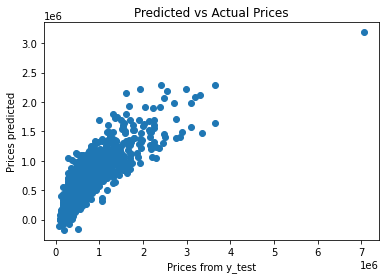

In [20]:
df1 = df.dropna()
X = df1.drop(['price'], axis=1)
y = df1['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

train_score = lr.score(X_train, y_train)
test_score = lr.score(X_test, y_test)

print('Train Score: ', train_score)
print('Test Score:  ', test_score)

price_predict = lr.predict(X_test)
plt.scatter(y_test, price_predict)
plt.xlabel('Prices from y_test')
plt.ylabel('Prices predicted');
plt.title('Predicted vs Actual Prices');

### Linear Regression (drop: 'date', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long')

Train Score:  0.6044754511583585
Test Score:   0.7016990693134955


Text(0.5, 1.0, 'Predicted vs Actual Prices')

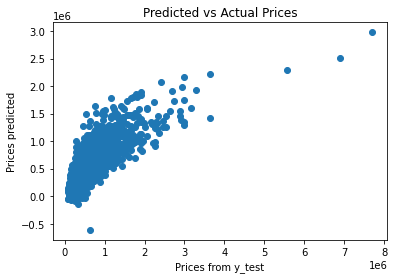

In [21]:
X = df[['bedrooms','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition',
       'grade','sqft_above','sqft_basement','sqft_living15','sqft_lot15']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

train_score = lr.score(X_train, y_train)
train_score = lr.score(X_test, y_test)

print('Train Score: ', train_score)
print('Test Score:  ', test_score)

price_predict = lr.predict(X_test)
plt.scatter(y_test, price_predict)
plt.xlabel('Prices from y_test')
plt.ylabel('Prices predicted');
plt.title('Predicted vs Actual Prices')